<center> <h5>Wintersemester 2024/25</h5> </center>
<center> <h1>Medizinische Bildanalyse</h1> </center>
<center> <h3>Aufgabenblatt 8</h3> </center>
<center> <h5>02. Dezember 2024</h5> </center>
<center> <h5>
    Prof. Dr. Thomas Schultz, 
    <a href = "mailto: jlen@uni-bonn.de">Jonathan Lennartz</a>,
    <a href = "mailto: jgruen@uni-bonn.de">Dr. Johannes Grün</a>
</h5> </center>
<center> <h5>Abgabefrist: <b>09.12.2024, 10:00 Uhr, via eCampus</b></h5> </center>
</br>


### Aufgabe 1 (Evaluierung von Segmentierungen, 10 Punkte)

a) Wenn man den Vordergrund als positive Klasse, den Hintergrund als negative Klasse ansieht, kann man eine Bildsegmentierung in Vorder- und Hintergrund auch als binäre Klassifikationsaufgabe für jeden Pixel betrachten. Die Ergebnisse eines binären Klassifikators können richtig positiv (RP), falsch positiv (FP), richtig negativ (RN) oder falsch negativ (FN) sein. Gängige Maße zur Beurteilung binärer Klassifikatoren sind darauf aufbauend Sensitivität (recall) R=RP/(RP+FN), positiver Vorhersagewert (precision) P=RP/(RP+FP) und deren harmonisches Mittel
$$F_1=\frac{2}{R^{-1}+P^{-1}}$$
Zeigt, dass dieser $F_1$-Score und der in der Vorlesung definierte Dice-Score äquivalent sind. (5P)

_Lösung:_ 

$$F_1 = \frac{2}{R^{-1} + P^{-1}} = \frac{2}{\frac{RP + FN}{RP} + \frac{RP + FP}{RP}} = \frac{2}{\left( \frac{2 \cdot RP + FP + FN}{RP} \right)} = \frac{2 \cdot RP}{2 \cdot RP + FP + FN}$$

$$|A \cap B| = RP, |A| = RP + FP, |B| = RP + FN$$

$$DSC(A, B) = \frac{2 \cdot |A \cap B|}{|A| + |B|} = \frac{2 \cdot RP}{RP + FP + RP + FN} = \frac{2 \cdot RP}{2 \cdot RP + FP + FN} = F_1$$

b) Die in der Vorlesung definierten Dice- und IoU-Scores sind sehr ähnlich motiviert und formuliert. Tatsächlich verhalten sie sich auch sehr ähnlich. Zeigt, dass insbesondere stets folgende Ungleichung gilt: (5P)
$$\frac{1}{2}\mathrm{DSC}\leq \mathrm{IoU}\leq \mathrm{DSC}$$

_Lösung:_ Zunächst zeige $\frac{1}{2}DSC \leq IoU$:
1. $$\frac{1}{2}DSC = \frac{\vert A \cap B \vert}{\vert A \vert + \vert B \vert}  \leq \frac{\vert A \cap B \vert}{\vert A \vert + \vert B \vert - \vert A \cap B \vert}= IoU$$ 
Da der Schnitt immer größer gleich 0 ist folgt das die Ungleichung gilt, da der Nenner nur kleiner kann. 
\begin{align*}
&IoU = \frac{\vert A \cap B \vert}{\vert A \vert + \vert B \vert - \vert A \cap B \vert} \leq \frac{2 \cdot (\vert A \cap B \vert)}{\vert A \vert + \vert B \vert} \\
& \Leftrightarrow \vert A \cap B \vert \cdot (\vert A \vert + \vert B \vert) \leq \vert A \cap B \vert \cdot (2\ \cdot \vert A \vert + 2 \cdot \vert B \vert - 2 \cdot \vert A \cap B \vert) \\
& \Leftrightarrow 0 \leq \vert A \cap B \vert \cdot (\vert A \vert + \vert B \vert - 2 \cdot \vert A \cap B \vert) \\
& \Leftrightarrow 0 \leq \vert A \cap B \vert \cdot (\vert A \cup B \vert - \vert A \cap B \vert) \\
\end{align*}
Man sieht in der Letzten Zeile das die Klammer größer gleich 0 ist, da die Vereinigung immer größer gleich ist als der Schnitt. Somit ist weil der Schnitt positiv ist die gesammte gleichung positiv und die Ungleichung gilt.

### Aufgabe 2 (Clustererkennung, 12 Punkte)

<center><img src="clusters.png" width="35%"/></center>
</br>
<center>Abbildung 2: Proteincluster von Zellmembranen in einem Mikroskopiebild.</center>
</br>
Die hellen Punkte in Abbildung 2 sind Proteincluster in einer Zellmembran und eine typische Aufgabe besteht darin, sie zu zählen. In dieser Aufgabe implementiert ihr dazu eine Pipeline, welche aus drei Teilen besteht: lokale Maximumerkennung, Glättung und Schwellenwert-Verfahren.  
</br>

a) Erklärt kurz die Rolle von jeder Operation. Schreibt eine Funktion, welche die drei Operationen in einer logischen Reihenfolge auf ein Input-Bild anwendet. (3P)

Wir glätten zunächst, um rauschen zu entfernen. Danach erkennen wir Maxima, um zu schauen wo die Proteincluster sind. Und dann filtern wir nach den Thresholds, damit wir die Maxima hervoheben. 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

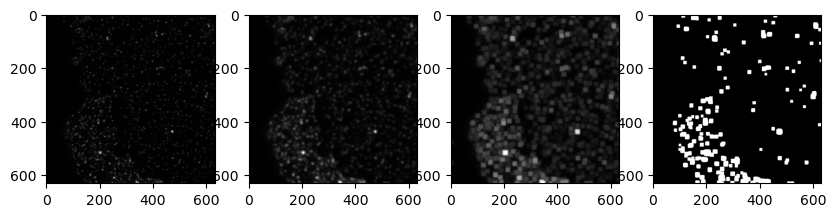

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, maximum_filter
import skimage.io
def protein_cluster_detection(input_image, sigma, threshold):
    fig, ax = plt.subplots(1, 4, figsize=(10, 5))
    ax[0].imshow(input_image, cmap='gray')
    smoothed_image = gaussian_filter(input_image, sigma=sigma)
    ax[1].imshow(smoothed_image, cmap='gray')
    local_max = maximum_filter(smoothed_image, size=10)
    ax[2].imshow(local_max, cmap='gray')
    thresholded = smoothed_image > threshold
    detected_clusters = np.where(local_max > threshold, 1, 0)
    ax[3].imshow(detected_clusters, cmap='gray')
    return detected_clusters

input_image = skimage.io.imread("clusters.png") / 255.0
protein_cluster_detection(input_image, 3 , 0.1)




_Lösung:_  


b) Erweitert die clustering Funktion so, dass sie ein Bild vor und nach jeder Operation plottet. (2P)

Siehe a) 


c) Das Ziel dieser Teilaufgabe ist es Interaktionsmöglichkeiten mit dem Schwellenwert, der Standardabweichung für die Glättung, sowie der minimale Distanz zwischen Maxima über Schieberegler in die Visualisierung zu integrieren. Benutzt dazu die *interact* Methode aus den jupyter widgets. Um das unveränderliche Bild *image* zu übergeben benutzt die *fixed* Methode und für die veränderlichen Parameter *IntSlider* oder *FloatSlider*. Was sind sinvolle Wertbereiche für die jeweiligen Variablen? (5P)


In [3]:
# Lösung

d) Mit welchen Werten bekommt man ein sinnvolles Ergebnis? (2P)  

_Lösung:_  
</br>

### Aufgabe 3 (Wasserscheiden, 15 Punkte)
<p align="center">
  <img alt="nucleidapiconfocal" src="nuclei.png" width="30%">
&nbsp; &nbsp; &nbsp; &nbsp;
  <img alt="watershed" src="watershed.png" width="30%">
</p>
Ziel dieser Aufgabe ist es den Wasserscheiden-Algorithmus anzuwenden, um die Zellen in obigem Bild zu segmentieren und zu zählen. 

a) Ladet das Bild ```nuclei.png``` in den Arbeitsspeicher. Benutzt einen geigneten Algorithums aus *skimage.filters* um einen Schwellenwert zu finden, der Vordergrund und Hintergrund separiert und plottet anschließend die resultierende Binärmaske. (2P)

In [2]:
import matplotlib.pyplot as plt

def plot_side_by_side(images):
    """
    Function to plot images side by side. For debugging and submission figures.
    
    images: list of images with roughly the same shape.
    """
    n = len(images)
    fig, axs = plt.subplots(1, n, figsize=(10, 5*n))
    for i, img in enumerate(images):
        axs[i].imshow(img)
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    return fig

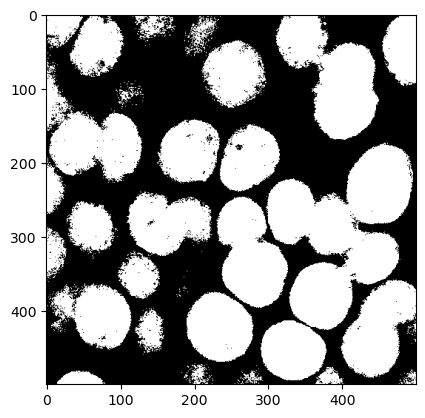

In [6]:
# Lösung:
import skimage as ski

img = ski.io.imread("nuclei.png", as_gray=True) / 255.0
threshold = ski.filters.threshold_otsu(img)
thresholded = np.where(img <= threshold, 0, 1)
plt.imshow(thresholded, cmap="gray")
plt.show()

b) Um aus der Binärmaske eine topologische Karte für den Wasserscheiden-Algorithmus zu erzeugen, brauchen wir die Distanztransformation (vgl. Slide 23 Vorlesung 4). Wendet diese auf die Binärmaske an und plottet das Ergebnis. (2P)

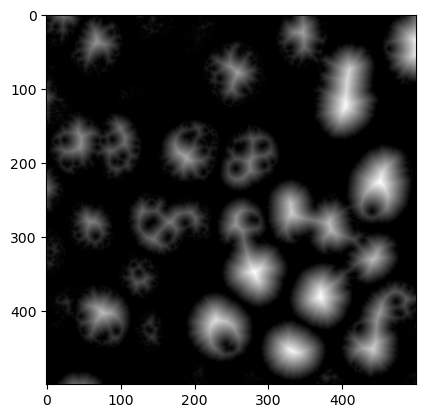

In [8]:
# Lösung:
import scipy as sp

distance = sp.ndimage.distance_transform_edt(thresholded)

plt.imshow(distance, cmap="gray")
plt.show()

c) Der Wasserscheiden-Algorithmus zählt Pixel immer dann als Grenze, wenn benachbarte Pixel zu verschiedenen Klassen gehören. Die zu berücksichtigenden Klassen können dabei durch Marker im Bild festgelegt werden. Geeignete Marker sind in unserem Fall lokale Maxima, wobei man eine gewisse Nachbarschaft berücksichtigen sollte um zu verhindern, dass dieselbe Zelle mehrere Marker enthält. Tragt diese Positionen in eine Maske ein und nutzt dafür fortlaufende positive Zahlen, sodass am Schluss jedes Maximum ein eindeutiges Label hat. (5P)  
_Tipp: peak_local_max ist die Funktion der Wahl. Dabei könnt ihr eure Suche durch das label-Argument auf den Vordergrund einschränken und mit footprint die Nachbarschaft bestimmen, in der ein Pixel ein Maximum sein muss um gezählt zu werden._

In [ ]:
# Lösung:


d) Benutzt den Wasserscheiden-Algorithmus aus dem *skimage.segmentation* Modul mit den Parametern die ihr bisher berechnet habt um die Zellen zu segmentieren und plottet das Ergebnis. (2P)  
_Tipp: Denkt an die Maske, die Vordergrund von Hintergrund trennt._

In [ ]:
# Lösung:


e) Momentan erscheinen die Ergebnisse übersegmentiert. Wie könnte man dieses Problem reduzieren? Schreibt eine Funktion, die eure bisherige Pipeline um euren Trick ergänzt. (3P)  
_Tipp: Das Ergebnis sollte ungefähr so aussehen wie das Schaubild am Anfang der Aufgabe._ 

In [ ]:
# Lösung:


### Aufgabe 4 (Segmentierung mit Aktiven Konturen, 13 Punkte)

<center><img src="free_form_contour.png" width="40%"/></center>
<center>Abbildung: Segmentierung eines Blutgefäßes mittels aktiver Konturen.</center>

Da die Initialisierung für eine Segmentierung mit aktiven Konturen eine wichtige Rolle spielt, ist es praktisch ein interaktives Tool zur Verfügung zu haben, in dem man die Initialisierung durch direkte Interaktion mit dem Bild festlegen und auch die übrigen Parameter einstellen kann. In Python ist das z.B. mit Hilfe des Dash Frameworks https://dash.plotly.com/ realisierbar. Da eine Einführung in die Dash-Programmierung den Rahmen unserer Übung sprengen würde, haben wir ein entsprechendes Tool vorbereitet, das ihr nur noch geringfügig ergänzen müsst.

Unser Tool nutzt die Implementierung eines Snakes-Modells, die scikit-image in `skimage.segmentation.active_contour` zur Verfügung stellt. Schaut euch dessen Dokumentation an, um die Parameter zu verstehen.

a) Installiert aktuelle Versionen von `dash`, `dash-bootstrap-components`, `pandas` und `regex`. Startet nun `python acm.py`, öffnet den im Terminal angezeigten URL im Browser, ladet das Bild `fundus-small.png` und macht Euch mit dem Annotationswerkzeug "Draw open freeform" vertraut. Unser Ziel wird es sein, so wie im Screenshot dargestellt mit einer offenen Kontur eines der großen Blutgefäße zu segmentieren. Zeichnet eine sinnvolle Initialisierung ein und macht einen Screenshot. (3P)

_Lösung:_

b) Damit das vorgegebene Tool korrekt funktioniert, müssen die eingezeichneten Initialisierungen in geeignete Polygonzüge konvertiert werden. Für offene Konturen ("Draw open freeform") soll dies in `resample_polygon` geschehen. Die Funktion nimmt ein 2D-Array entgegen, wobei die erste Dimension $n$ der Zahl der bei der Annotation erzeugten Punkte entspricht und die zweite Dimension die entsprechenden $(y,x)$ Koordinaten enthält. Die Zahl `n_points` gibt die Anzahl an Stützstellen an, aus der die aktive Kontur bestehen soll. Sie lässt sich über den Regler "Stützstellen" einstellen. Ergänzt die Funktion so, dass sie ein 2D-Array zurückgibt, das den in `yx` gegebenen Polygonzug gleichmäßig abtastet, sodass wir genau `n_points` Stützstellen erhalten.  

Ein Klick auf "Start ACM" sollte nun die aktive Kontur in Bewegung setzen. Der aktuelle Stand wird nach jeder Iteration angezeigt. Wenn ihr mit dem Ergebnis zufrieden seid, könnt ihr das Modell mit "Stop" anhalten. Findet nun geeignete Parameter, um ein Blutgefäß zu segmentieren. Macht einen Screenshot von Eurem Ergebnis, der auch die Parameter zeigt. Welche Rolle spielt es, wie viele Stützpunkte ihr einstellt und wie stark ihr das Bild vorglättet (Parameter `sigma`)? (10P)  

_Tipp:_ Nutzt gern `numpy.interp`

_Antwort:_ 